# 主成分分析

## データセット

In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
y = iris.target
data = iris.data

## sklearnのPCA

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

In [3]:
X_dec = pca.fit_transform(data)

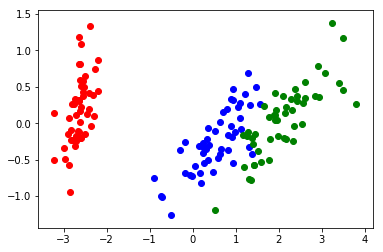

In [4]:
plt.scatter(X_dec[y==0][:, 0], X_dec[y==0][:, 1], color='red')
plt.scatter(X_dec[y==1][:, 0], X_dec[y==1][:, 1], color='blue')
plt.scatter(X_dec[y==2][:, 0], X_dec[y==2][:, 1], color='green')

# 分散行列

In [5]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

## 分散行列の固有ベクトル

In [6]:
pca.components_.T

array([[ 0.36138659,  0.65658877],
       [-0.08452251,  0.73016143],
       [ 0.85667061, -0.17337266],
       [ 0.3582892 , -0.07548102]])

## 分散行列の固有値

In [7]:
pca.explained_variance_

array([4.22824171, 0.24267075])

# 自分で実装

## 平均を0にする

In [19]:
data = (data - np.mean(data, axis=0))

## 分散行列

In [20]:
# 不偏分散(bias=0)
cov = np.cov(data, rowvar=0, bias=0)
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## 固有値と固有ベクトル

In [21]:
# 特異値分解
U, S, _ = np.linalg.svd(cov)

print(U) # 固有ベクトル
print(S) # 固有値

[[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]
[4.22824171 0.24267075 0.0782095  0.02383509]


固有ベクトルと固有値はsklearnの値と一致しているが、分散行列は値が一致していない。  
sklearnではnoise_varianceを足しているのが原因？

# 次元圧縮を行う

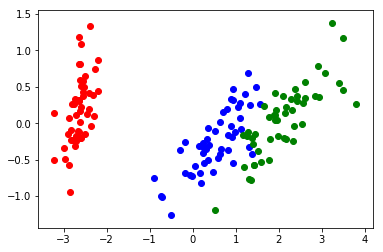

In [22]:
X_dec = data @ U[:, :2] * -1
plt.scatter(X_dec[y==0][:, 0], X_dec[y==0][:, 1], color='red')
plt.scatter(X_dec[y==1][:, 0], X_dec[y==1][:, 1], color='blue')
plt.scatter(X_dec[y==2][:, 0], X_dec[y==2][:, 1], color='green')